In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.io

# Regularized Linear Regression

In [2]:
data = scipy.io.loadmat('Data/ex5Data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [3]:
#training set
X = data['X']
y = data['y']
y = y[:,0] #np.squeeze(y)

#cross validation set
Xval = data['Xval']
yval = data['yval']
yval = yval[:,0]

#test set
Xtest = data['Xtest']
ytest = data['ytest']
ytest = ytest[:,0]

In [4]:
print(f'number of training examples: {y.size}')
print(f'number of cross validation examples: {yval.size}')
print(f'number of test examples: {ytest.size}')

number of training examples: 12
number of cross validation examples: 21
number of test examples: 21


$$\displaystyle{J(\theta) = \sum_{t=1}^m (h_{\theta}(x^{(t)}) - y^{(t)})^2 + \lambda \sum_{j=1}^n \theta_j ^2}$$
$$\displaystyle{\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}\sum_{t=1}^m (h_{\theta}(x^{(t)}) - y^{(t)})x_j ^{(t)}} \quad \text{if} \quad j=0$$
$$\displaystyle{\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{t=1}^m (h_{\theta}(x^{(t)}) - y^{(t)})x_j ^{(t)} + \frac{\lambda}{m}\theta_j} \quad \text{if} \quad j\geq1$$

In [5]:
def linearRegCostFunction(theta, X, y, Lambda):
    m = y.shape[0]
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    h_theta = X@theta
    
    #cost function
    costTerm = (np.linalg.norm(h_theta - y))**2
    regularizationTerm = Lambda*((np.linalg.norm(theta[1:]))**2)
    J = (costTerm + regularizationTerm)/(2*m) 
    
    #grad
    error = h_theta - y
    grad_0 = np.array([(X[:,0]@error)/m])
    grad_1 = (X[:,1:].T@error + Lambda*theta[1:])/m
    #grad = np.array([grad_0, grad_1])
    grad = np.concatenate((grad_0, grad_1))
    return J, grad

In [6]:
initial_theta = np.array([1,1])
Lambda = 1
J, grad = linearRegCostFunction(initial_theta, X, y, Lambda)

In [7]:
J, grad

(303.99319222026423, array([-15.30301567, 598.25074417]))

In [8]:
def train_linear_regression(X, y, Lambda):
    n = X.shape[1] + 1
    initial_theta = np.ones(n)
    res = optimize.minimize(linearRegCostFunction, x0=initial_theta, args = (X,y,Lambda), method='CG', jac=True,options={'maxiter': 250})
    theta = res.x
    return theta     

In [9]:
#solve and plot
theta = train_linear_regression(X,y, 0)
theta

array([13.08790734,  0.36777925])

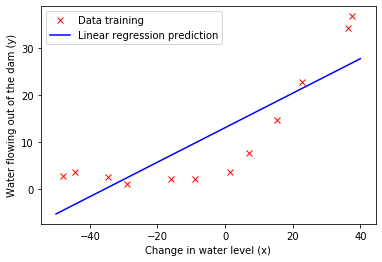

In [10]:
plt.plot(X, y,'x', color='red')
x = np.linspace(-50,40,1000)
x = np.stack((np.ones((x.shape[0])),x), axis=1)
h_theta = x@theta
plt.plot(x[:,1],h_theta,'-', color='blue')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.legend(['Data training', 'Linear regression prediction'])

# Bias Variance 

In [11]:
def learningCurve(X,y, Xval, yval, Lambda):
    Lambda=0
    m = y.shape[0]
    #m_val = yval.shape[0]
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    for t in range(1,m+1): #t=1,...,m
        Xt = X[0:t,:]
        yt = y[0:t]
        thetat = train_linear_regression(Xt,yt, Lambda)
        error_train[t-1],_ = linearRegCostFunction(thetat, Xt, yt, 0)
#         Xvalt = Xval[0:t,:]
#         yvalt = yval[0:t]
        #the cross validation data have fix size, the size which change it's from trainig set,
        #and therefore act modifying the theta fitted. Using this theta fitted (without modifying cross
        #validation set), it's computed the error validation
        error_val[t-1],_ = linearRegCostFunction(thetat, Xval, yval, 0) #linearRegCostFunction(thetat, Xvalt, yvalt, 0)
    return error_train, error_val

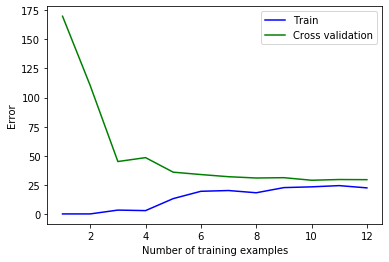

In [12]:
error_train, error_val = learningCurve(X,y, Xval, yval, Lambda)
m = y.shape[0]
plt.plot(np.arange(1,m+1), error_train, '-', color='blue')
plt.plot(np.arange(1,m+1), error_val, '-', color='green')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])
#UNDERFITING (HIGH BIAS)

# Polynomial Regression

In [13]:
def polyFeatures(X, p):
    return X**np.arange(1,p+1)

In [14]:
p = 8
X_poly = polyFeatures(X,p)
X_poly

array([[-1.59367581e+01,  2.53980260e+02, -4.04762197e+03,
         6.45059724e+04, -1.02801608e+06,  1.63832436e+07,
        -2.61095791e+08,  4.16102047e+09],
       [-2.91529792e+01,  8.49896197e+02, -2.47770062e+04,
         7.22323546e+05, -2.10578833e+07,  6.13900035e+08,
        -1.78970150e+10,  5.21751305e+11],
       [ 3.61895486e+01,  1.30968343e+03,  4.73968522e+04,
         1.71527069e+06,  6.20748719e+07,  2.24646160e+09,
         8.12984311e+10,  2.94215353e+12],
       [ 3.74921873e+01,  1.40566411e+03,  5.27014222e+04,
         1.97589159e+06,  7.40804977e+07,  2.77743990e+09,
         1.04132297e+11,  3.90414759e+12],
       [-4.80588295e+01,  2.30965109e+03, -1.10999128e+05,
         5.33448815e+06, -2.56369256e+08,  1.23208064e+10,
        -5.92123532e+11,  2.84567638e+13],
       [-8.94145794e+00,  7.99496701e+01, -7.14866612e+02,
         6.39194974e+03, -5.71533498e+04,  5.11034273e+05,
        -4.56939146e+06,  4.08570215e+07],
       [ 1.53077929e+01,  2.343285

In [15]:
np.max(X_poly, axis=0)

array([3.74921873e+01, 2.30965109e+03, 5.27014222e+04, 5.33448815e+06,
       7.40804977e+07, 1.23208064e+10, 1.04132297e+11, 2.84567638e+13])

In [16]:
np.mean(X_poly, axis=0)*np.ones((m,1))

array([[-5.08542635e+00,  8.48904834e+02, -1.28290173e+04,
         1.28967789e+06, -2.98314592e+07,  2.29330301e+09,
        -6.84527284e+10,  4.42233759e+12],
       [-5.08542635e+00,  8.48904834e+02, -1.28290173e+04,
         1.28967789e+06, -2.98314592e+07,  2.29330301e+09,
        -6.84527284e+10,  4.42233759e+12],
       [-5.08542635e+00,  8.48904834e+02, -1.28290173e+04,
         1.28967789e+06, -2.98314592e+07,  2.29330301e+09,
        -6.84527284e+10,  4.42233759e+12],
       [-5.08542635e+00,  8.48904834e+02, -1.28290173e+04,
         1.28967789e+06, -2.98314592e+07,  2.29330301e+09,
        -6.84527284e+10,  4.42233759e+12],
       [-5.08542635e+00,  8.48904834e+02, -1.28290173e+04,
         1.28967789e+06, -2.98314592e+07,  2.29330301e+09,
        -6.84527284e+10,  4.42233759e+12],
       [-5.08542635e+00,  8.48904834e+02, -1.28290173e+04,
         1.28967789e+06, -2.98314592e+07,  2.29330301e+09,
        -6.84527284e+10,  4.42233759e+12],
       [-5.08542635e+00,  8.489048

In [17]:
np.std(X_poly, axis=0)*np.ones((12,1))

array([[2.86887308e+01, 7.54346385e+02, 4.61380464e+04, 1.66104441e+06,
        8.99399404e+07, 3.68940106e+09, 1.89508052e+11, 8.31905350e+12],
       [2.86887308e+01, 7.54346385e+02, 4.61380464e+04, 1.66104441e+06,
        8.99399404e+07, 3.68940106e+09, 1.89508052e+11, 8.31905350e+12],
       [2.86887308e+01, 7.54346385e+02, 4.61380464e+04, 1.66104441e+06,
        8.99399404e+07, 3.68940106e+09, 1.89508052e+11, 8.31905350e+12],
       [2.86887308e+01, 7.54346385e+02, 4.61380464e+04, 1.66104441e+06,
        8.99399404e+07, 3.68940106e+09, 1.89508052e+11, 8.31905350e+12],
       [2.86887308e+01, 7.54346385e+02, 4.61380464e+04, 1.66104441e+06,
        8.99399404e+07, 3.68940106e+09, 1.89508052e+11, 8.31905350e+12],
       [2.86887308e+01, 7.54346385e+02, 4.61380464e+04, 1.66104441e+06,
        8.99399404e+07, 3.68940106e+09, 1.89508052e+11, 8.31905350e+12],
       [2.86887308e+01, 7.54346385e+02, 4.61380464e+04, 1.66104441e+06,
        8.99399404e+07, 3.68940106e+09, 1.89508052e+11, 8.

In [18]:
def normalizeFeature(X):
    m = X.shape[0]
    Max_by_rows = np.max(X_poly, axis=0) #px1
    Min_by_rows = np.min(X_poly, axis=0) #px1
    X_normalized = (X - np.mean(X_poly, axis=0)*np.ones((m,1)))/np.std(X_poly, axis=0)*np.ones((m,1))
    return X_normalized

In [19]:
X_normalized_poly = normalizeFeature(X_poly)
X_normalized_poly

array([[-3.78243704e-01, -7.88662325e-01,  1.90328720e-01,
        -7.37591303e-01,  3.20251970e-01, -6.17151602e-01,
         3.59835014e-01, -5.31091256e-01],
       [-8.38920100e-01,  1.31420204e-03, -2.58961742e-01,
        -3.41564822e-01,  9.75492734e-02, -4.55196644e-01,
         2.66773432e-01, -4.68873807e-01],
       [ 1.43871736e+00,  6.10831582e-01,  1.30534069e+00,
         2.56220001e-01,  1.02186338e+00, -1.26962121e-02,
         7.90210009e-01, -1.77926980e-01],
       [ 1.48412330e+00,  7.38068463e-01,  1.42031240e+00,
         4.13121830e-01,  1.15534830e+00,  1.31223708e-01,
         9.10700224e-01, -6.22895388e-02],
       [-1.49791929e+00,  1.93643966e+00, -2.12774745e+00,
         2.43510061e+00, -2.51876748e+00,  2.71792174e+00,
        -2.76331690e+00,  2.88908182e+00],
       [-1.34409278e-01, -1.01936614e+00,  2.62563148e-01,
        -7.72577738e-01,  3.31046537e-01, -6.21453712e-01,
         3.61188658e-01, -5.31586524e-01],
       [ 7.10844248e-01, -8.147136

In [21]:
X_normalized_poly.shape

(12, 8)

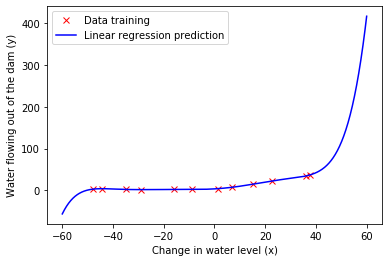

In [40]:
theta = train_linear_regression(X_normalized_poly, y, 0)
plt.plot(X, y,'x', color='red')
x_vec = np.linspace(-60,60,1000)
x = x_vec[:,np.newaxis]
x = normalizeFeature(polyFeatures(x,p))
x = np.concatenate((np.ones((x.shape[0],1)),x), axis=1)
h_theta = x@theta
plt.plot(x_vec, h_theta,'-', color='blue')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.legend(['Data training', 'Linear regression prediction'])

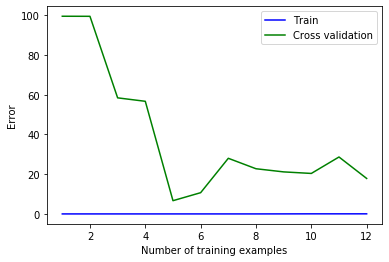

In [45]:
Xval_normalized_poly = normalizeFeature(polyFeatures(Xval,p))
error_train, error_val = learningCurve(X_normalized_poly,y, Xval_normalized_poly, yval, 0)
plt.plot(np.arange(1,m+1), error_train, '-', color='blue')
plt.plot(np.arange(1,m+1), error_val, '-', color='green')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])
#OVERFITTING (HIGH VARIANCE)

### $\lambda=1$

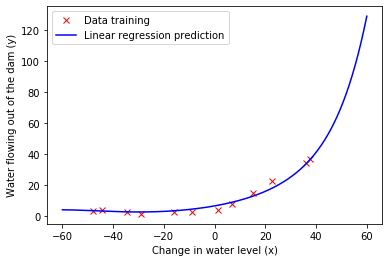

In [46]:
Lambda = 1
theta = train_linear_regression(X_normalized_poly, y, Lambda)
plt.plot(X, y,'x', color='red')
x_vec = np.linspace(-60,60,1000)
x = x_vec[:,np.newaxis]
x = normalizeFeature(polyFeatures(x,p))
x = np.concatenate((np.ones((x.shape[0],1)),x), axis=1)
h_theta = x@theta
plt.plot(x_vec, h_theta,'-', color='blue')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.legend(['Data training', 'Linear regression prediction'])

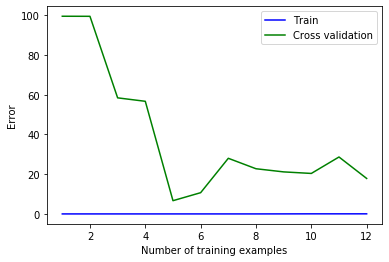

In [48]:
Xval_normalized_poly = normalizeFeature(polyFeatures(Xval,p))
error_train, error_val = learningCurve(X_normalized_poly,y, Xval_normalized_poly, yval, Lambda)
plt.plot(np.arange(1,m+1), error_train, '-', color='blue')
plt.plot(np.arange(1,m+1), error_val, '-', color='green')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])
#OVERFITTING (HIGH VARIANCE)

### $\lambda = 100$

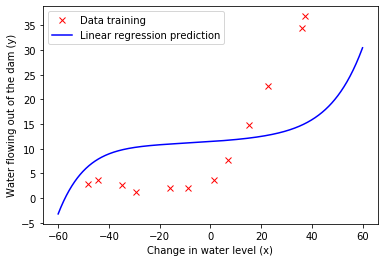

In [49]:
Lambda = 100
theta = train_linear_regression(X_normalized_poly, y, Lambda)
plt.plot(X, y,'x', color='red')
x_vec = np.linspace(-60,60,1000)
x = x_vec[:,np.newaxis]
x = normalizeFeature(polyFeatures(x,p))
x = np.concatenate((np.ones((x.shape[0],1)),x), axis=1)
h_theta = x@theta
plt.plot(x_vec, h_theta,'-', color='blue')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.legend(['Data training', 'Linear regression prediction'])
#Underfitting

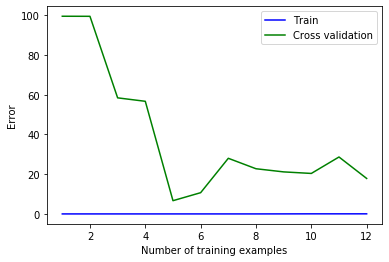

In [50]:
Xval_normalized_poly = normalizeFeature(polyFeatures(Xval,p))
error_train, error_val = learningCurve(X_normalized_poly,y, Xval_normalized_poly, yval, Lambda)
plt.plot(np.arange(1,m+1), error_train, '-', color='blue')
plt.plot(np.arange(1,m+1), error_val, '-', color='green')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])
#OVERFITTING (HIGH VARIANCE)

## Selecting $\lambda$ using a cross validation set

In [55]:
LAMBDAS = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
n_lambdas = len(LAMBDAS)
theta_lambda = np.zeros(n_lambdas)
error_train_lambda = np.zeros(n_lambdas)
error_val_lambda = np.zeros(n_lambdas)

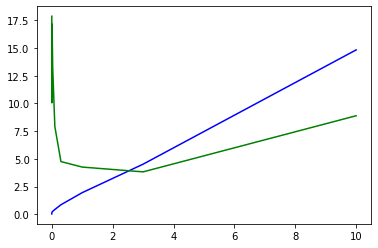

In [60]:
for i,Lambda in enumerate(LAMBDAS):
    theta_lambda = train_linear_regression(X_normalized_poly, y, Lambda)
    error_train_lambda[i],_ = linearRegCostFunction(theta_lambda, X_normalized_poly, y, 0)
    error_val_lambda[i],_ = linearRegCostFunction(theta_lambda, Xval_normalized_poly, yval, 0)
plt.plot(LAMBDAS, error_train_lambda, linestyle = '-', color = 'blue')
plt.plot(LAMBDAS, error_val_lambda, linestyle = '-', color = 'green')
#the best choice of lambda seem to be around lambda = 3

# Test error

In [62]:
Lambda = 3
theta_opt = train_linear_regression(X_normalized_poly, y, Lambda)
TestError,_ = linearRegCostFunction(theta_opt, normalizeFeature(polyFeatures(Xtest,p)), ytest, 0)
TestError

3.5720432230877046